# Week 3 Exercise

In [1]:
knitr::opts_chunk$set(echo = FALSE)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggthemes))
suppressPackageStartupMessages(library(knitr))
suppressPackageStartupMessages(library(kableExtra))
suppressPackageStartupMessages(library(latex2exp))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(tsbox))
cel <- suppressMessages(
    drop_na(read_csv("../assignment_1/cel_volden_wiseman_coursera.csv"))
)

Following the directions on the Coursera assignment page, you will make four
original visualizations.

### Put your name here: Marcio Woitek

## Exercise 1

**Explain what you are visualizing here:**

For this exercise, I'll use the CEL data. Specifically, I'll utilize some
data related to the 114th Congress. For this Congress, I want to answer the
following question: how are the members distributed according to gender? Then
I'm going to create a bar plot that shows the number of men and the number of
women in the 114th Congress. The numbers corresponding to Democrats and
Republicans will be presented separately.

**Put your figure here:**

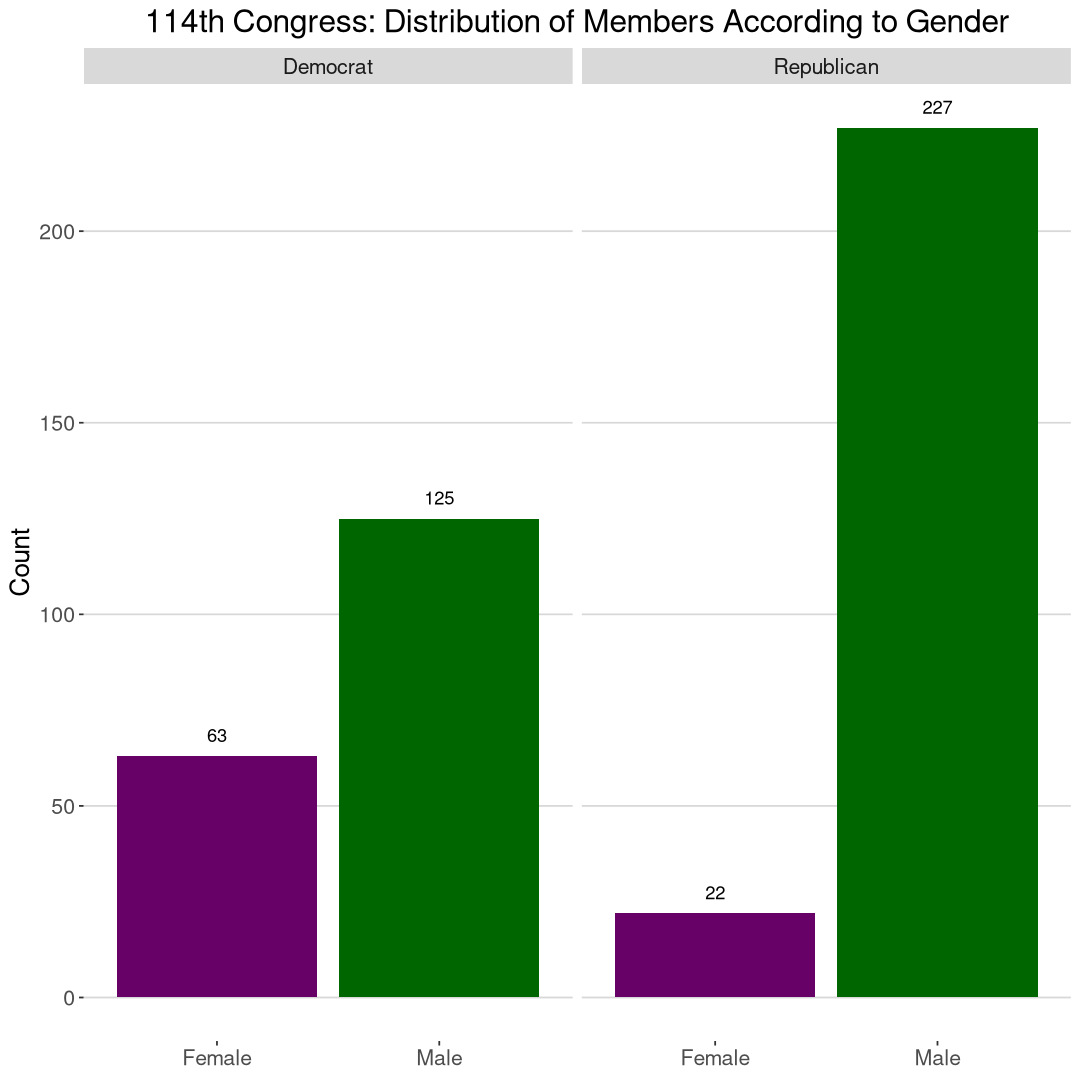

In [2]:
# Get only the data corresponding to the 114th Congress.
# Select only the `dem` and `female` columns.
data_plot_1 <- cel %>%
    dplyr::filter(congress == 114) %>%
    dplyr::select(dem, female)

# Recode the `dem` variable, and rename it as `Party`:
data_plot_1$dem <- dplyr::recode(
    data_plot_1$dem,
    `0` = "Republican",
    `1` = "Democrat"
)
data_plot_1 <- dplyr::rename(data_plot_1, Party = dem)

# Recode the `female` variable, and rename it as `Gender`:
data_plot_1$female <- dplyr::recode(
    data_plot_1$female,
    `0` = "Male",
    `1` = "Female"
)
data_plot_1 <- dplyr::rename(data_plot_1, Gender = female)

# Plot the figure:
options(repr.plot.height = 9, repr.plot.width = 9)
ggplot(data_plot_1, ggplot2::aes(x = Gender, fill = Gender)) +
    ggplot2::geom_bar() +
    ggplot2::geom_text(stat = "count", aes(label = ..count.., vjust = -1)) +
    ggplot2::labs(
        y = "Count",
        title = "114th Congress: Distribution of Members According to Gender"
    ) +
    ggthemes::theme_hc(base_size = 16) +
    ggplot2::theme(
        axis.title.x = element_blank(),
        plot.title = element_text(hjust = 0.5)
    ) +
    ggplot2::scale_fill_manual(
        values = c("Male" = "#006700", "Female" = "#670067")
    ) +
    ggplot2::facet_wrap(vars(Party)) +
    ggplot2::guides(fill = FALSE)

## Exercise 2

**Explain what you are visualizing here:**

Once again, I'm using the CEL data. This time I'll visualize the change in
the ideology of the members of Congress (as measured by the DW-Nominate
score) over a time period of 20 years. To do so, I'm going to consider only
the data associated with the last 10 Congresses included in the dataset. For
each party, I'll create a set of box plots. The $i$-th box will show the
distribution of the `dwnom1` variable corresponding to the $i$-th Congress.

**Put your figure here:**

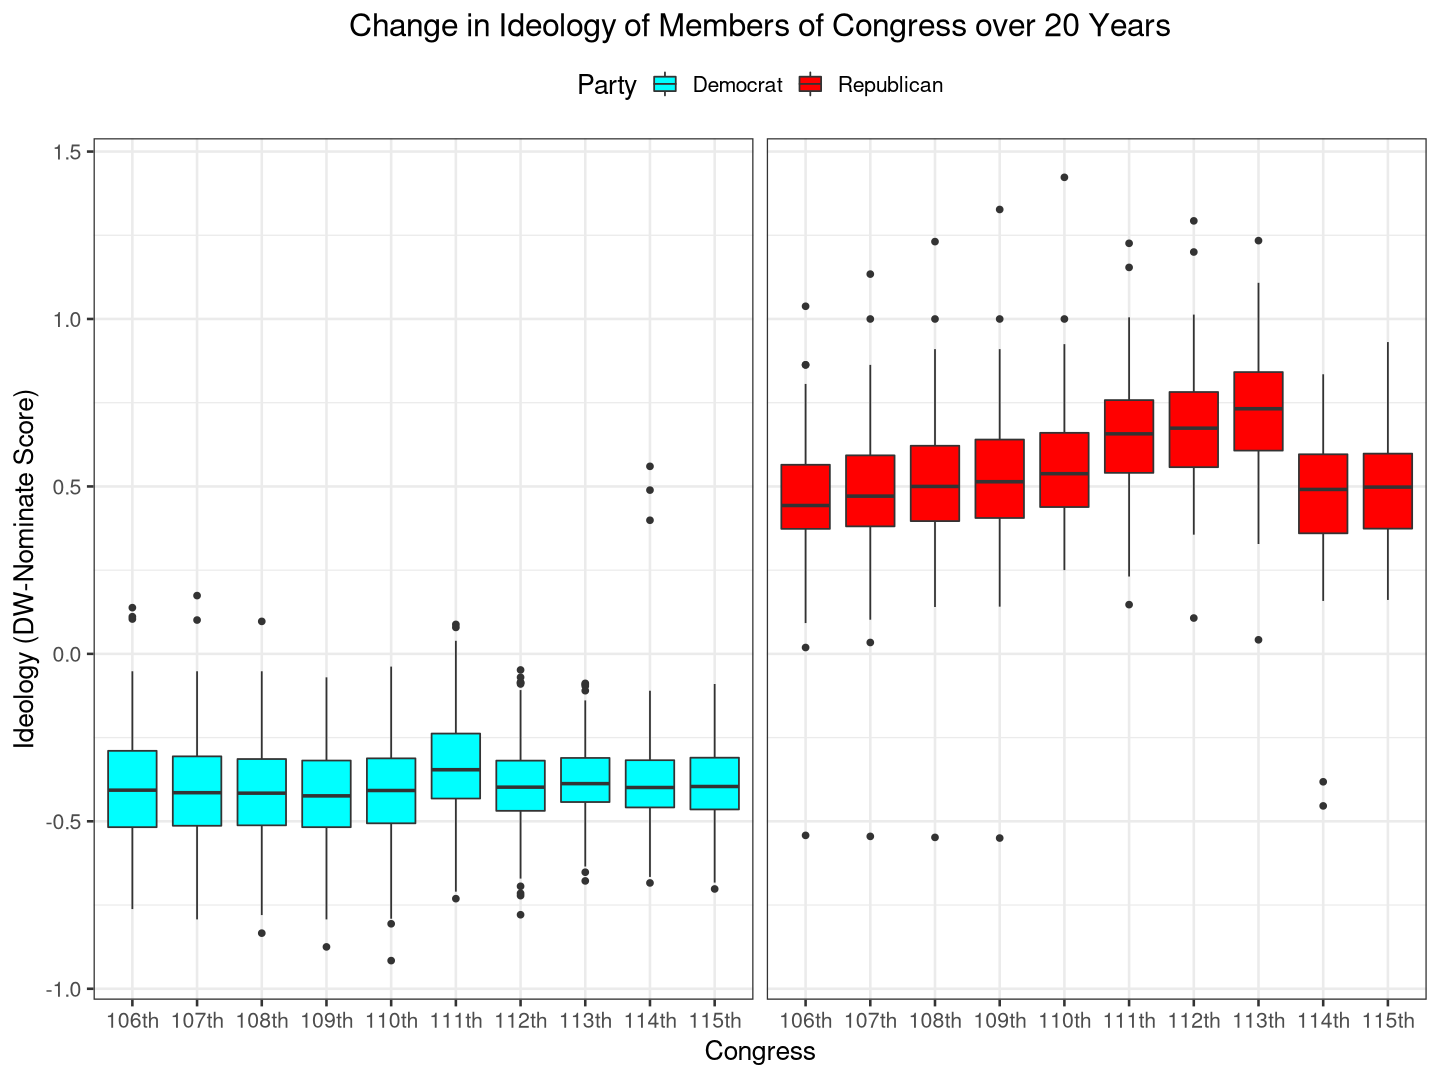

In [3]:
# Get only the data corresponding to the last 10 Congresses.
# Select only the `congress`, `dwnom1` and `dem` columns.
data_plot_2 <- cel %>%
    dplyr::filter(congress > 105) %>%
    dplyr::select(congress, dwnom1, dem)

# Recode the `congress` variable:
data_plot_2$congress <- dplyr::recode(
    data_plot_2$congress,
    `106` = "106th",
    `107` = "107th",
    `108` = "108th",
    `109` = "109th",
    `110` = "110th",
    `111` = "111th",
    `112` = "112th",
    `113` = "113th",
    `114` = "114th",
    `115` = "115th"
)

# Recode the `dem` variable, and rename it as `Party`:
data_plot_2$dem <- dplyr::recode(
    data_plot_2$dem,
    `0` = "Republican",
    `1` = "Democrat"
)
data_plot_2 <- dplyr::rename(data_plot_2, Party = dem)

# Plot the figure:
options(repr.plot.height = 9, repr.plot.width = 12)
ggplot(data_plot_2, ggplot2::aes(x = congress, y = dwnom1, fill = Party)) +
    ggplot2::geom_boxplot() +
    ggplot2::labs(
        x = "Congress",
        y = "Ideology (DW-Nominate Score)",
        title = "Change in Ideology of Members of Congress over 20 Years"
    ) +
    ggplot2::facet_wrap(vars(Party)) +
    ggplot2::theme_bw(base_size = 16) +
    ggplot2::theme(
        legend.direction = "horizontal",
        legend.position = "top",
        plot.title = element_text(hjust = 0.5),
        strip.background = element_blank(),
        strip.text = element_blank()
    ) +
    ggplot2::scale_fill_manual(
        values = c("Democrat" = "#00FFFF", "Republican" = "#FF0000")
    )

## Exercise 3

**Explain what you are visualizing here:**

For this exercise, I'm going to use a dataset called `nottem`. This is one of
R's built-in datasets. It contains average air temperatures at Nottingham for
20 years (1920-1939). These are monthly averages, given in degrees Fahrenheit.

Arbitrarily, I chose to consider the year 1927. For this year, I'll create
a line plot showing the changes in temperature over the months.

This is the data I'm going to plot:

In [4]:
# Import the dataset:
data(nottem)

# This dataset is a Time-Series object.
# To plot its data using `ggplot2`, convert `nottem` into a tibble.
# This is done with the aid of the `tsbox` library.
data_plot_3 <- tsbox::ts_tbl(nottem) %>%
    dplyr::rename(Date = time, Temperature = value)

# Create 2 columns, one for the years, and the other for the months.
# Select the data corresponding to the year 1927.
# Drop the `Date` and `Year` columns.
data_plot_3 <- data_plot_3 %>%
    dplyr::mutate(
        Year = as.integer(format(Date, "%Y")),
        Month = format(Date, "%m")
    ) %>%
    dplyr::filter(Year == 1927) %>%
    dplyr::select(Month, Temperature)

# Recode the `Month` column:
data_plot_3[["Month"]] <- dplyr::recode(
    data_plot_3[["Month"]],
    "01" = "Jan",
    "02" = "Feb",
    "03" = "Mar",
    "04" = "Apr",
    "05" = "May",
    "06" = "Jun",
    "07" = "Jul",
    "08" = "Aug",
    "09" = "Sep",
    "10" = "Oct",
    "11" = "Nov",
    "12" = "Dec"
)

# Print the tibble:
data_plot_3
# knitr::kable(
#     data_plot_3,
#     format = "html",
#     table.attr = "style='width:25%;'"
# ) %>% kableExtra::kable_styling()

Month,Temperature
<chr>,<dbl>
Jan,39.4
Feb,38.5
Mar,45.3
Apr,47.1
May,51.7
Jun,55.0
Jul,60.4
Aug,60.5
Sep,54.7


**Put your figure here:**

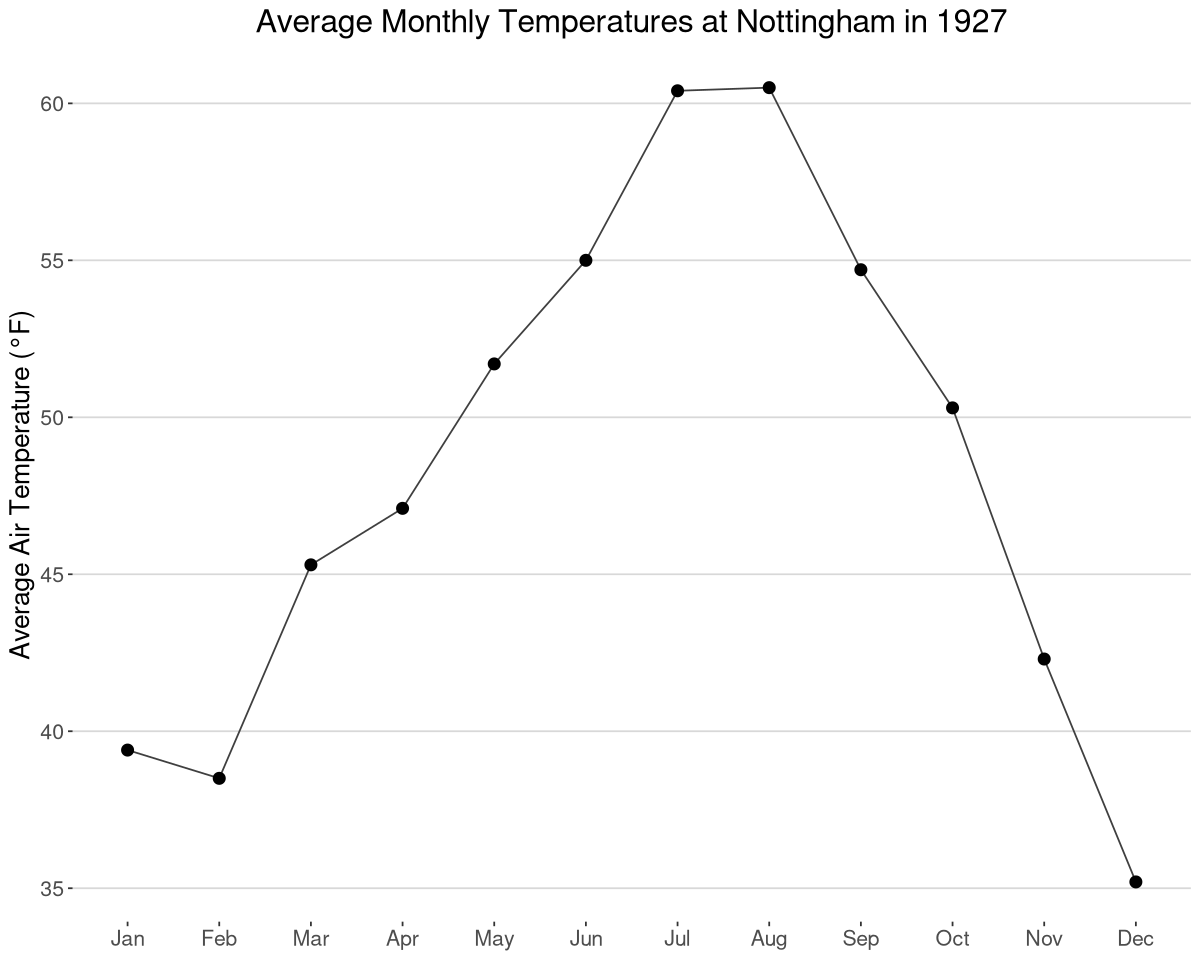

In [5]:
# Plot the figure:
options(repr.plot.height = 8, repr.plot.width = 10)
ggplot(data_plot_3, ggplot2::aes(x = Month, y = Temperature, group = 1)) +
    ggplot2::geom_line(color = "#3F3F3F") +
    ggplot2::geom_point(color = "#000000", size = 3) +
    ggplot2::labs(
        y = "Average Air Temperature (\u00B0F)",
        title = "Average Monthly Temperatures at Nottingham in 1927"
    ) +
    ggplot2::scale_x_discrete(
        limits = c(
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec"
        )
    ) +
    ggthemes::theme_hc(base_size = 16) +
    ggplot2::theme(
        axis.title.x = element_blank(),
        plot.title = element_text(hjust = 0.5)
    )

## Exercise 4

**Explain what you are visualizing here:**

For this last exercise, I'll use "fake" data. More precisely, I'm going to
generate some data related to a variable $y$ that can be modeled as a linear
function of another variable $x$. Arbitrarily, I chose the theoretical
relation between $x$ and $y$ to be the following: $y = 5 - \frac{x}{2}$. To
make things a little more interesting, I'll also add some noise to $y$. Using
my synthetic data, I'll create a scatter plot.

This is the data I'm going to plot:

In [6]:
# Generate values for `x`:
x <- seq(from = -3, to = 5, length.out = 20)

# Use the values of `x` to generate the theoretical values of `y`:
y_theor <- 5 - 0.5 * x

# Generate some noise:
set.seed(0)
noise <- runif(length(x), min = -0.3, max = 0.3)

# Use `y_theor` and `noise` to generate values for `y`:
y <- y_theor + noise

# Use `x`, `y_theor` and `y` to create a tibble:
data_plot_4 <- tibble::tibble("x" = x, "y_theor" = y_theor, "y" = y)

# Print the tibble:
data_plot_4
# knitr::kable(
#     data_plot_4,
#     col.names = c("x", "y (Theoretical)", "y (with Noise)"),
#     format = "html",
#     table.attr = "style='width:40%;'"
# ) %>% kableExtra::kable_styling()

x,y_theor,y
<dbl>,<dbl>,<dbl>
-3.00000000,6.500000,6.738018
-2.57894737,6.289474,6.148779
-2.15789474,6.078947,6.002222
-1.73684211,5.868421,5.912133
-1.31578947,5.657895,5.902819
-0.89473684,5.447368,5.268378
-0.47368421,5.236842,5.475876
-0.05263158,5.026316,5.293121
0.36842105,4.815789,4.912268


**Put your figure here:**

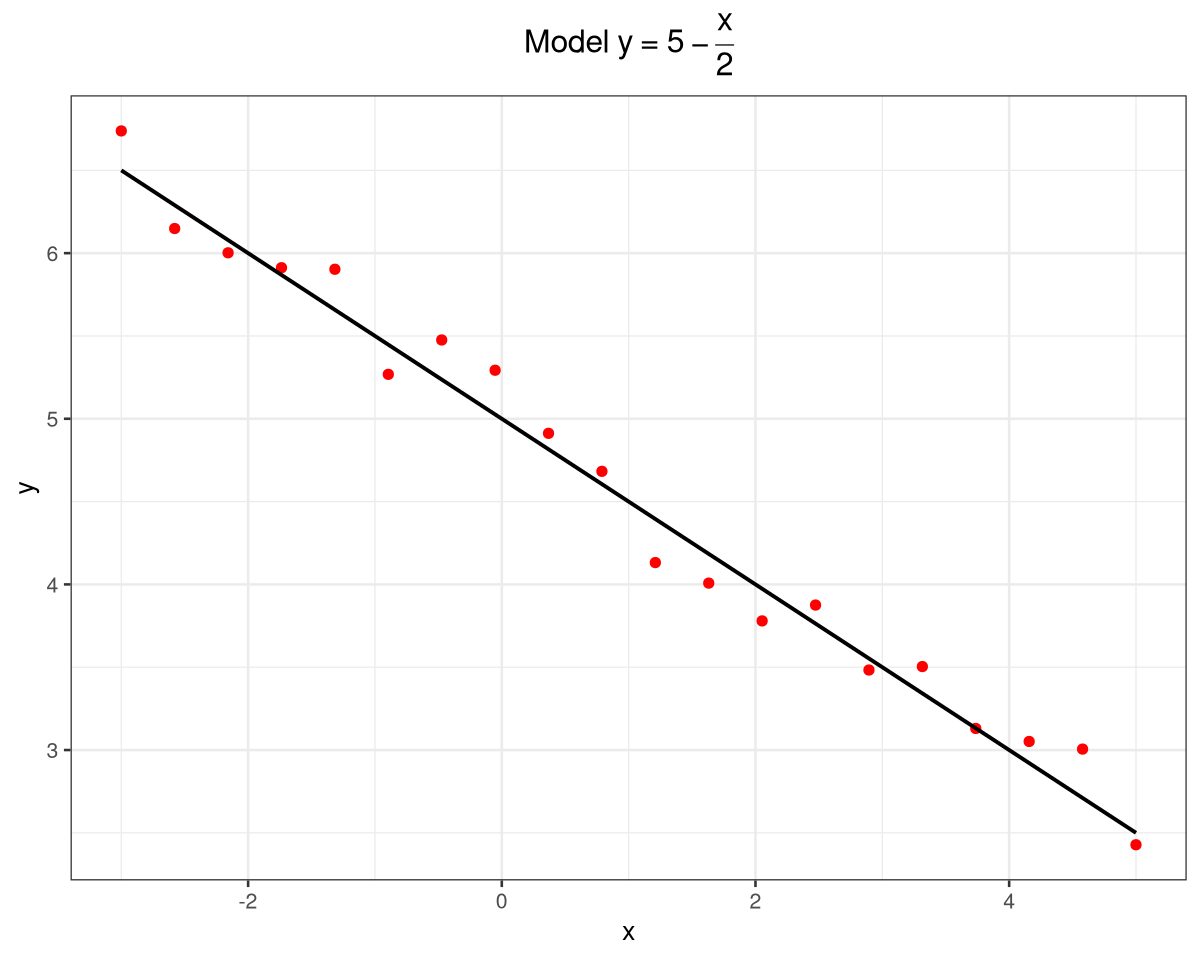

In [7]:
# Plot the figure:
options(repr.plot.height = 8, repr.plot.width = 10)
ggplot(data_plot_4, ggplot2::aes(x = x)) +
    ggplot2::geom_point(ggplot2::aes(y = y), color = "#FF0000", size = 2.5) +
    ggplot2::geom_line(ggplot2::aes(y = y_theor), size = 1.1) +
    ggplot2::labs(title = latex2exp::TeX("Model $y = 5 - \\frac{x}{2}$")) +
    ggplot2::theme_bw(base_size = 16) +
    ggplot2::theme(plot.title = element_text(hjust = 0.5))